In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
# Info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
# Exclude 'Market Category' column because it has too much null data

df.drop(["Market Category"], axis=1, inplace=True)

In [5]:
# Delete records that have null data

df = df.dropna()

In [6]:
# Check the dataset

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [7]:
# Check the numerical features.

df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
# Use 'LabelEncoder' to change object type columns

encoder = LabelEncoder()

df_enc = df

df_enc["Make"] = encoder.fit_transform(df["Make"])
df_enc["Model"] = encoder.fit_transform(df["Model"])
df_enc["Engine Fuel Type"] = encoder.fit_transform(df["Engine Fuel Type"])
df_enc["Transmission Type"] = encoder.fit_transform(df["Transmission Type"])
df_enc["Driven_Wheels"] = encoder.fit_transform(df["Driven_Wheels"])
df_enc["Vehicle Size"] = encoder.fit_transform(df["Vehicle Size"])
df_enc["Vehicle Style"] = encoder.fit_transform(df["Vehicle Style"])

In [9]:
# Extract the feature columns and target column (MSRP)

features = df_enc.drop(["MSRP"], axis=1)
target = df_enc["MSRP"]

In [10]:
#Mutual Information Score

In [11]:
# Compute the mutual information between the features and target
mi = mutual_info_regression(features, target)

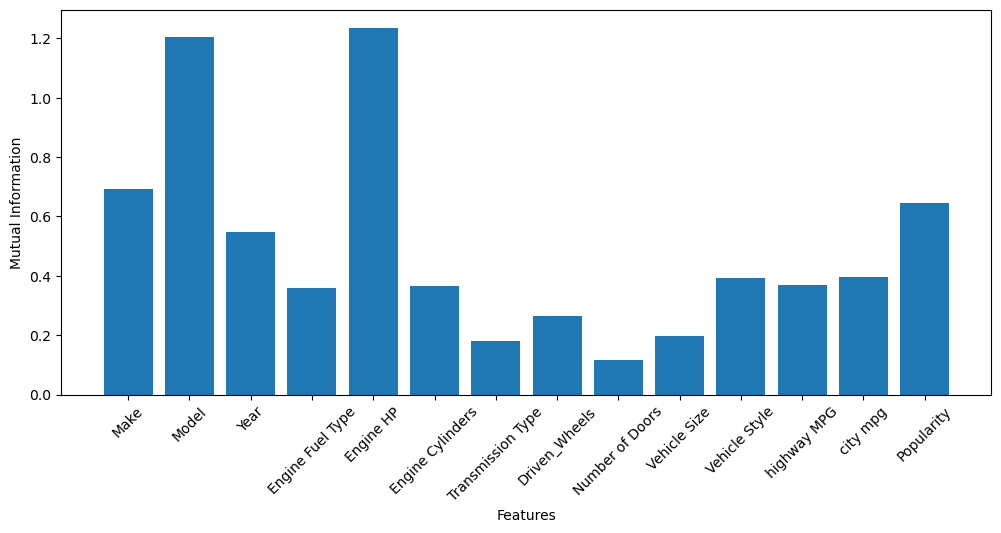

In [12]:
# Plot the results
plt.figure(figsize=(12,5))

plt.bar(features.columns, mi)
plt.xlabel("Features")
plt.xticks(rotation = 45) 
plt.ylabel("Mutual Information")
plt.show()

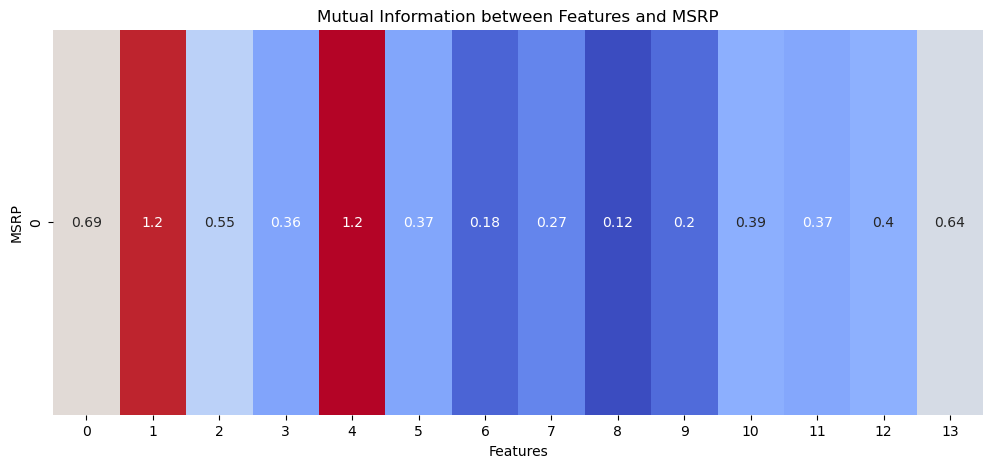

In [13]:
# Plot the mutual information as a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(mi.reshape(1, -1), annot=True, cmap='coolwarm', cbar=False)

# Add the title and labels
plt.title("Mutual Information between Features and MSRP")
plt.xlabel("Features")
plt.ylabel("MSRP")

# Show the plot
plt.show()